In [21]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [23]:
#Load in the dataset
data = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=data.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

In [87]:
#Build the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [88]:
#Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
#Fit the model
ret = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2976 - accuracy: 0.9123 - val_loss: 0.1457 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1472 - accuracy: 0.9567 - val_loss: 0.1040 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9670 - val_loss: 0.0979 - val_accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0905 - accuracy: 0.9726 - val_loss: 0.0817 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9753 - val_loss: 0.0761 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0686 - accuracy: 0.9785 - val_loss: 0.0750 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9811 - val_loss: 0.0735 - val_accuracy:

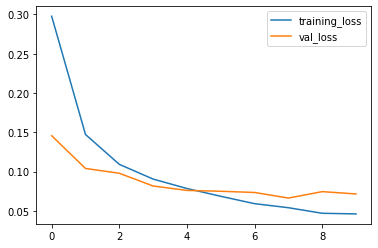

In [90]:
import matplotlib.pyplot as plt
plt.plot(ret.history['loss'],label='training_loss')
plt.plot(ret.history['val_loss'],label='val_loss')
plt.legend()

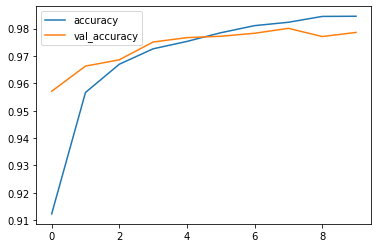

In [91]:
plt.plot(ret.history['accuracy'],label='accuracy')
plt.plot(ret.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [73]:
pred=model.predict(x_test)
pred

array([[3.3331835e-10, 3.5218110e-11, 6.2035504e-08, ..., 9.9998963e-01,
        4.2064942e-11, 3.2465540e-08],
       [6.8163822e-11, 3.2933453e-08, 1.0000000e+00, ..., 8.6838137e-23,
        5.8164849e-12, 1.6049682e-20],
       [3.2032972e-08, 9.9995053e-01, 7.4058671e-06, ..., 2.8490799e-06,
        2.8917490e-05, 6.5865996e-10],
       ...,
       [9.8510355e-15, 3.6025480e-14, 1.4229933e-14, ..., 1.2311435e-06,
        1.4609347e-10, 4.7884305e-06],
       [9.1366290e-11, 5.6704376e-17, 1.8465650e-14, ..., 1.5857914e-12,
        4.4640754e-07, 1.1401233e-17],
       [6.8346738e-11, 8.0029109e-19, 2.8989580e-09, ..., 2.2371890e-18,
        1.9513020e-12, 1.2898108e-19]], dtype=float32)

In [92]:
#Evaluate the model
model.evaluate(x_test,y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9786


[0.07154955714941025, 0.978600025177002]

In [93]:
model.save('MNISTANN.h5')

Confusion matrix, without normalization
[[ 973    0    1    2    0    0    1    1    2    0]
 [   0 1123    3    1    0    1    2    2    3    0]
 [   7    0 1011    1    1    0    2    6    4    0]
 [   3    0    6  989    0    4    0    2    3    3]
 [   3    0    3    1  964    0    3    1    0    7]
 [   2    0    0   15    2  867    1    2    2    1]
 [   9    2    2    1    4    4  935    0    1    0]
 [   2    3    9    2    0    0    0 1007    0    5]
 [   6    1    5    3    5    6    5    5  934    4]
 [   4    3    1    5    8    6    0    6    3  973]]


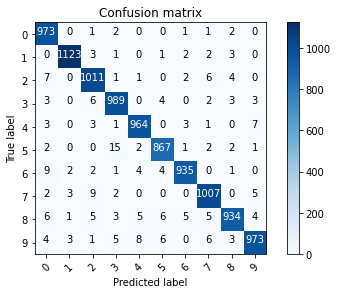

In [76]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

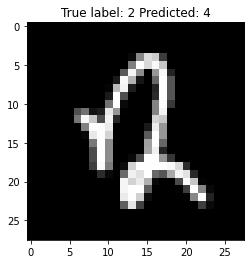

In [77]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));